## tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)


In [1]:
tips = sns.load_dataset("tips")  
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 가설
1. total_bill 이 높을 수록 팁을 많이 줄 것이다.
2. size 가 높을수록 팁을 많이 줄 것이다.
3. Lunch 보다는 Dinner가 많이 줄 것이다.


## 분석 과정 설정

- 전체 데이터와 함께 팁 액수에 따른 구간별 그룹을 설정하여 분석한다.
    - 평균 tip = 3 
    - (3 미만, 3이상 5 이하, 5 초과)

#### 초기 세팅

In [2]:
def rounder(number):
    if number %10 > 4:
        number = number//10 * 10 + 5
    else:
        number = number//10 * 10
    return int(number)

In [3]:
tips["count"] = 1
total_bill = tips["total_bill"] 
tip = tips["tip"]
tips['a_total'] = tips["total_bill"].apply(rounder)

In [4]:
def day_to_num(x):
    if str(x) == 'Thur':
        return 0
    elif str(x) == 'Fri':
        return 1
    elif str(x) == 'Sat':
        return 2
    elif str(x) =='Sun':
        return 3

In [5]:
tips['sex2'] = tips['sex'].apply(lambda x: 0 if len(x) == 4 else 1)
tips['day2'] = tips['day'].apply(day_to_num)
tips['time2'] = tips['time'].apply(lambda x: 0 if len(x) == 5 else 1)
tips['smoker2'] = tips['smoker'].apply(lambda x: 0 if len(x) == 2 else 1)
tips['size2'] = tips['size']

In [6]:
%matplotlib inline

In [7]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("muted", 4)

#### 구간별 그룹 설정

In [8]:
tips_lower= tips[tips["tip"]<3].reset_index()

In [9]:
tips_upper3= tips[tips["tip"]>=3]
tips_upper3= tips_upper3[tips_upper3["tip"]<=5].reset_index()

In [10]:
tips_upper5= tips[tips["tip"]>5].reset_index()

In [11]:
tips_less5= tips[tips["tip"]<=5].reset_index()

In [12]:
mean_tip, median_tip = round(tips['tip'].mean(), 2), tips['tip'].median()
print("total [mean: {}, median: {}]".format(mean_tip, median_tip))

mean_tip3, median_tip3 = round(tips_upper3['tip'].mean(), 2), tips_upper3['tip'].median()
print("upper 3 [mean: {}, median: {}]".format(mean_tip3, median_tip3))

mean_tip5, median_tip5 = round(tips_upper5['tip'].mean(), 2), tips_upper5['tip'].median()
print("upper 5 [mean: {}, median: {}]".format(mean_tip5, median_tip5))

mean_less5, median_less5 = round(tips_less5['tip'].mean(), 2), tips_less5['tip'].median()
print("less 5 [mean: {}, median: {}]".format(mean_less5, median_less5))

total [mean: 3.0, median: 2.9]
upper 3 [mean: 3.65, median: 3.5]
upper 5 [mean: 6.27, median: 5.885]
less 5 [mean: 2.74, median: 2.605]


---

## 가설1. total_bill이 클수록 tip이 증가할 것이다.

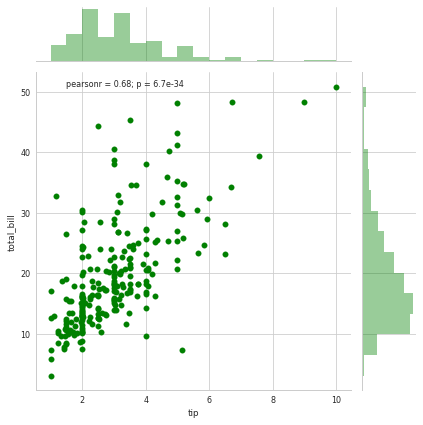

In [13]:
sns.jointplot(tips["tip"],tips['total_bill'] , color = 'green')
plt.show()

In [14]:
to = tips.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean') # 그래프 변화가 너무 커서 index값을 조정했다.
to3 = tips_upper3.pivot_table(index="total_bill", values="tip", columns="count", aggfunc='mean')
to5 = tips_upper5.pivot_table(index="total_bill", values="tip", columns="count", aggfunc='mean')
to_lower = tips_lower.pivot_table(index="total_bill", values="tip", columns="count", aggfunc='mean')

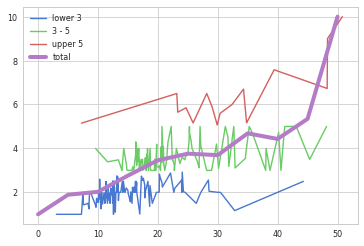

In [15]:
plt.plot(to_lower, label = 'lower 3')
plt.plot(to3, label= '3 - 5')
plt.plot(to5, label = 'upper 5')
plt.plot(to, lw=4,label= 'total')
plt.legend(loc=0)
plt.show()

### a_total : total_bill 을 길이 5의 구간으로 나눔

In [16]:
to = tips.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to3 = tips_upper3.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to5 = tips_upper5.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to_lower = tips_lower.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')

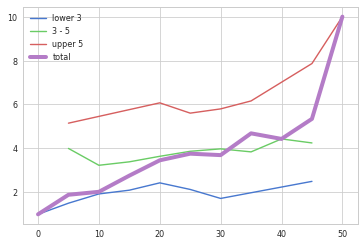

In [17]:
plt.plot(to_lower, label = 'lower 3')
plt.plot(to3, label= '3 - 5')
plt.plot(to5, label = 'upper 5')
plt.plot(to, lw= '4',label= 'total')
plt.legend(loc=0)
plt.show()

#### 가설 1 검증:
- 5 달러 이하의 팁을 낸 사람들은 total_bill과 tip간의 관계가 나타나지 않는다.
- 다만, 5달러 초과의 팁을 낸 사람들은 total_bill이 증가할 수록 팁을 더 내는 경향이 보인다.


#### 팁을 많이 내는 그룹은 total_bill에 비례해 팁을 더 낸다.
-  팁을 적게 주는 그룹의 팁 액수는 total_bill 과 연관이 없다.

---

## 가설 2. size가 커질수록 팁이 증가한다.
- size와 (tip의 평균값)이 비례

In [18]:
s_to = tips.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')
s_3 = tips_upper3.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')
s_5 = tips_upper5.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')
s_lo = tips_lower.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')

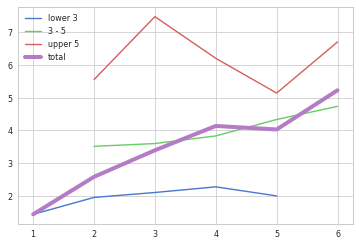

In [19]:
plt.plot(s_lo, label = 'lower 3')
plt.plot(s_3, label= '3 - 5')
plt.plot(s_5, label = 'upper 5')
plt.plot(s_to, lw='4',label= 'total')
plt.legend(loc=0)
plt.show()

#### 가설 2 검증:
- 전체값이 가설1의 전체값과 비슷한 양상을 띄고 있다.
- 구간별 그룹간의 차이를 분석하기에는 데이터 구간이 좁다.

---

### 가설 1& 2 의 상관 예상
- 사람수가 많으면 많이 먹는다...
- 따라서 size와 total_bill은 같은 방향의 feature

In [20]:
ts_t= tips.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')
ts_l=tips_lower.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')
ts_3=tips_upper3.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')
ts_5=tips_upper5.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')

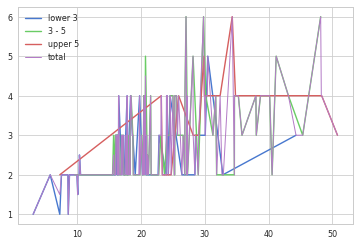

In [21]:
plt.plot(ts_l, label = 'lower 3')
plt.plot(ts_3, label= '3 - 5')
plt.plot(ts_5, label = 'upper 5')
plt.plot(ts_t, lw='1',label= 'total')
plt.legend(loc=0)
plt.show()

분포값이 너무 다양해 a_total로 구간을 나누었다

In [22]:
ts_t= tips.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')
ts_l=tips_lower.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')
ts_3=tips_upper3.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')
ts_5=tips_upper5.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')

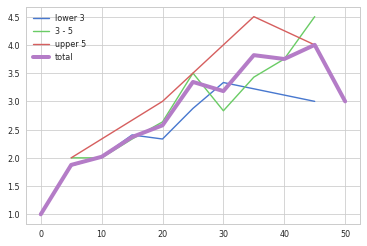

In [23]:
plt.plot(ts_l, label = 'lower 3')
plt.plot(ts_3, label= '3 - 5')
plt.plot(ts_5, label = 'upper 5')
plt.plot(ts_t, lw='4',label= 'total')
plt.legend(loc=0)
plt.show()

#### - 가설 1(total_bill)과 2(size)의 값은 서로 양의 상관을 가진다.
- 일정 수치(그룹마다 상이)를 지나면 음의 상관으로 바뀐다.
    - 머릿수에 따라 총 음식값이 증가하지만 일정 수준 이후에는 감소
    
    
## 1&2 분석
- 테이블의 사람이 많을 수록 음식 값이 많이 나온다.
- 총 음식 값과 인원 수는 팁과는 (upper5 제외하고는) 큰 연관이 없다.

---

## 가설3. Lunch < Dinner

In [24]:
time_t = tips.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')
time_l = tips_lower.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')
time_3 = tips_upper3.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')
time_5 = tips_upper5.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')

In [25]:
data = {
   'lower 3': time_l[1],
   'upper 3': time_3[1],
   'upper 5':time_5[1],
    }  
result = pd.DataFrame(data)
result['total'] = time_t[1]

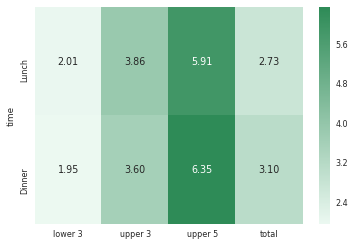

In [26]:
sns.heatmap(result, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, fmt=".2f")
plt.show()

가설 3 검증:
- 팁을 많이 주는 그룹을 제외하고는, 점심과 저녁의 차이가 뚜렷하지 않다.

---

# 가설 재수립
1. 성별
1. 흡연여부
1. 요일

## 2 - 1. 성별
- 마찬가지로 그룹별 분석
- 결과값이 뚜렷하게 나타나지 않아 log와 exp로 조정

In [27]:
sex_t = tips.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')
sex_l = tips_lower.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')
sex_3 = tips_upper3.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')
sex_5 = tips_upper5.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')

In [28]:
data = {
   'lower 3': sex_l[1],
   'upper 3': sex_3[1],
   'upper 5':sex_5[1],
    }  
sex_result = pd.DataFrame(data)
sex_result['total'] = sex_t[1]
sex_result

,lower 3,upper 3,upper 5,total
sex,,,,
Male,1.954267,3.641029,6.493571,3.089618
Female,2.003958,3.666000,5.502500,2.833448


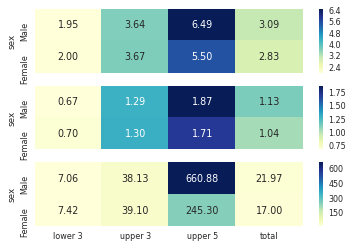

In [29]:
plt.subplot(311)
sns.heatmap((sex_result), xticklabels=False, cmap='YlGnBu', annot=True, fmt=".2f") #default
plt.subplot(312)
sns.heatmap(np.log(sex_result), xticklabels=False ,cmap='YlGnBu', annot=True, fmt=".2f") # log
plt.subplot(313)
sns.heatmap(np.exp(sex_result), cmap='YlGnBu', annot=True, fmt=".2f") # exp
plt.show()

### 가설 2-1 검증:
- upper 5 그룹을 제외하고는 남여간의 팁 차이는 뚜렷하게 나타나지 않는다.
- upper 5 그룹에서는 남성이 팁을 다소 더 주는 경향이 있다. 

---

## 2 - 2. 흡연
- 성별 분석과 동일

In [30]:
smoker_t = tips.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')
smoker_l = tips_lower.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')
smoker_3 = tips_upper3.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')
smoker_5 = tips_upper5.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')

In [31]:
data = {
   'lower 3': smoker_l[1],
   'upper 3': smoker_3[1],
   'upper 5':smoker_5[1],
    }  
smoke_result = pd.DataFrame(data)
smoke_result['total'] = smoker_t[1]
smoke_result

,lower 3,upper 3,upper 5,total
smoker,,,,
Yes,1.912093,3.605227,6.493333,3.008710
No,2.006750,3.682542,6.163333,2.991854


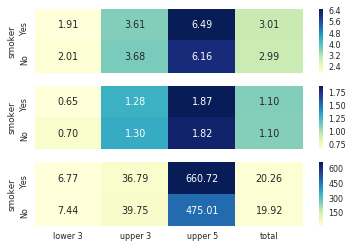

In [32]:
plt.subplot(311)
sns.heatmap((smoke_result), xticklabels=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(312)
sns.heatmap(np.log(smoke_result), xticklabels=False ,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(313)
sns.heatmap(np.exp(smoke_result), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

### 가설 2 - 2 검증:
- 가설 2 - 1 과 유사하다

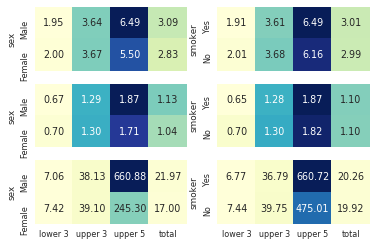

In [33]:
#가설 2-1
plt.subplot(321)
sns.heatmap((sex_result), xticklabels=False, cbar=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(323)
sns.heatmap(np.log(sex_result), xticklabels=False ,cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(325)
sns.heatmap(np.exp(sex_result), cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")
#가설 2-2
plt.subplot(322)
sns.heatmap((smoke_result), xticklabels=False,cbar=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(324)
sns.heatmap(np.log(smoke_result), xticklabels=False ,cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(326)
sns.heatmap(np.exp(smoke_result), cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")


plt.show()

### 가설 2-1 & 2-2
실제로 성별 결과와 흡연 결과의 큰 차이가 없어 보인다.
- 다만, upper_5그룹에서 성별간의 차이가 흡연 유무의 차이보다 더 크다.

---

## 가설 2 - 3. 요일

In [34]:
day_t = tips.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')
day_3 = tips_upper3.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')
day_5 = tips_upper5.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')
day_l = tips_lower.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')

In [35]:
data = {
   'lower 3': day_l[1],
   'upper 3': day_3[1],
   'upper 5':day_5[1],
    }  
day_result = pd.DataFrame(data)
day_result['total'] = day_t[1]
day_result

,lower 3,upper 3,upper 5,total
day,,,,
Thur,2.008500,3.882632,5.906667,2.771452
Fri,1.855556,3.526000,NaN,2.734737
Sat,1.931778,3.502286,7.270000,2.993103
Sun,2.027241,3.699744,5.538750,3.255132


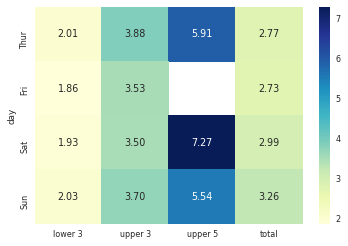

In [36]:
sns.heatmap((day_result), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

###  가설 2-3 검증:
- (목-일)요일간의 차이가 미미하다.

---

# 가설 3. upper 5 그룹의 특징이 있을 것이다.

In [37]:
tips_upper5 # 총 18팀, 244팀 중 7%

,index,total_bill,tip,sex,smoker,day,time,size,count,a_total,sex2,day2,time2,smoker2,size2
0,23,39.42,7.58,Male,No,Sat,Dinner,4,1,35,0,2,1,0,4
1,44,30.40,5.60,Male,No,Sun,Dinner,4,1,30,0,3,1,0,4
2,47,32.40,6.00,Male,No,Sun,Dinner,4,1,30,0,3,1,0,4
3,52,34.81,5.20,Female,No,Sun,Dinner,4,1,35,1,3,1,0,4
4,59,48.27,6.73,Male,No,Sat,Dinner,4,1,45,0,2,1,0,4
5,85,34.83,5.17,Female,No,Thur,Lunch,4,1,35,1,0,0,0,4
6,88,24.71,5.85,Male,No,Thur,Lunch,2,1,25,0,0,0,0,2
7,116,29.93,5.07,Male,No,Sun,Dinner,4,1,25,0,3,1,0,4
8,141,34.30,6.70,Male,No,Thur,Lunch,6,1,35,0,0,0,0,6
9,155,29.85,5.14,Female,No,Sun,Dinner,5,1,25,1,3,1,0,5


### 3 - 1. 흡연 특징

In [38]:
sr = tips_upper5.pivot_table(index="smoker2", values = 'count', columns='smoker', aggfunc=np.sum )
srt = tips.pivot_table(index="smoker2", values = 'count', columns='smoker', aggfunc=np.sum )

values 값을 count로 잡는다. upper_5 그룹이 어떤 분포인지 알기 위해.

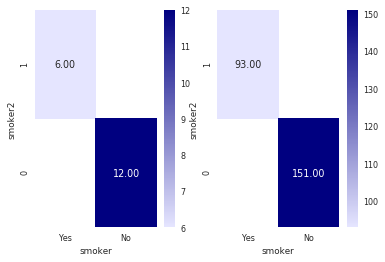

In [39]:
plt.subplot(121)
sns.heatmap(sr, cmap=sns.light_palette("navy", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(122)
sns.heatmap(srt, cmap=sns.light_palette("navy", as_cmap=True), annot=True, fmt=".2f")

plt.show()

In [40]:
smoke_rate_t = round(srt.iloc[0,0]/(srt.iloc[0,0] + srt.iloc[1,1]) * 100, 2)
smoke_rate_5 =round(sr.iloc[0,0]/(sr.iloc[0,0] + sr.iloc[1,1]) * 100, 2)
print("total smoke rate : {} \nupper_5 smoke rate : {}".format(smoke_rate_t, smoke_rate_5))

total smoke rate : 38.11 
upper_5 smoke rate : 33.33


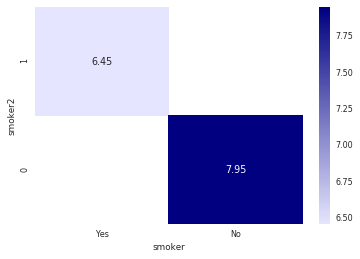

In [41]:
sns.heatmap(sr/srt*100, cmap=sns.light_palette("navy", as_cmap=True), annot=True, fmt=".2f")
plt.show()

#### 가설 3 - 검증1. 
- 전체 흡연율에 비해 팁을 많이 주는 그룹의 흡연율이 5%p 낮다.
- 비흡연자 고객이 upper_5그룹일 확률 12/151, 7.95%
- 흡연자 고객이 upper_5그룹일 확률 6/93, 6.45%


### 비흡연자 고객에게 팁을 많이 받을 확률이 1.5%p 더 높다.

검증1-2.

In [42]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel

In [43]:
cpd_S = TabularCPD('Upper5', 2, [[1-18/244, 18/244]])
print(cpd_S) # upper5

╒══════════╤═══════════╕
│ Upper5_0 │ 0.92623   │
├──────────┼───────────┤
│ Upper5_1 │ 0.0737705 │
╘══════════╧═══════════╛


In [44]:
cpd_US = TabularCPD('Smoke', 2, np.array([[1-87/226, 1-1/3], [87/226, 1/3]]),
                                    evidence=['Upper5'], evidence_card=[2])
print(cpd_US)

╒═════════╤═════════════════════╤════════════════════╕
│ Upper5  │ Upper5_0            │ Upper5_1           │
├─────────┼─────────────────────┼────────────────────┤
│ Smoke_0 │ 0.6150442477876106  │ 0.6666666666666667 │
├─────────┼─────────────────────┼────────────────────┤
│ Smoke_1 │ 0.38495575221238937 │ 0.3333333333333333 │
╘═════════╧═════════════════════╧════════════════════╛


In [45]:
model = BayesianModel([('Upper5', 'Smoke')])
model.add_cpds(cpd_S, cpd_US)
model.check_model()

True

In [46]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(['Upper5'], evidence={'Smoke': 0}) # no Smoke 일때,
print(posterior['Upper5']) #  upper5일 확률 : 7.95%
posterior = infer.query(['Upper5'], evidence={'Smoke': 1}) # Smoke 일때,
print(posterior['Upper5']) #  upper5일 확률 : 6.45%

╒══════════╤═══════════════╕
│ Upper5   │   phi(Upper5) │
╞══════════╪═══════════════╡
│ Upper5_0 │        0.9205 │
├──────────┼───────────────┤
│ Upper5_1 │        0.0795 │
╘══════════╧═══════════════╛
╒══════════╤═══════════════╕
│ Upper5   │   phi(Upper5) │
╞══════════╪═══════════════╡
│ Upper5_0 │        0.9355 │
├──────────┼───────────────┤
│ Upper5_1 │        0.0645 │
╘══════════╧═══════════════╛


---

### 3 - 2. 시간 특징

In [47]:
LD = tips_upper5.pivot_table(index="time2", values = 'count', columns='time', aggfunc=np.sum )
LDt = tips.pivot_table(index="time2", values = 'count', columns='time', aggfunc=np.sum)

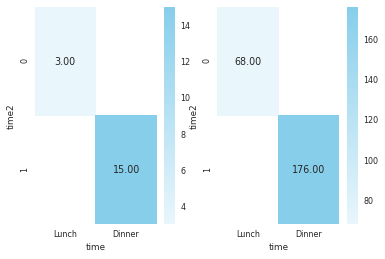

In [48]:
plt.subplot(121)
sns.heatmap(LD, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(122)
sns.heatmap(LDt, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt=".2f")

plt.show()

In [49]:
LD_rate_t = round(LDt.iloc[1,1]/(LDt.iloc[0,0] + LDt.iloc[1,1]) * 100, 2)
LD_rate_5 =round(LD.iloc[1,1]/(LD.iloc[0,0] + LD.iloc[1,1]) * 100, 2)

print("LD rate : {} \nupper_5 LD rate : {}".format(LD_rate_t, LD_rate_5))

LD rate : 72.13 
upper_5 LD rate : 83.33


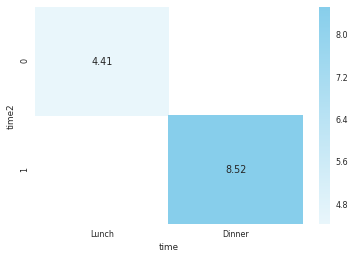

In [50]:
sns.heatmap(LD/LDt*100, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt=".2f")
plt.show()

#### 가설 3 - 검증2. 
- 점심시간에 비해 저녁시간에 upper_5그룹이 올 확률이 높다.
- Dinner에 온 고객이 upper_5그룹일 확률 8.52%
- Lunch에 온 고객이 upper_5그룹일 확률 4.41%

### 저녁시간에 온 고객에게 팁을 많이 받을 확률이 4%p 높다.

---

### 3 - 3 요일 특징

In [51]:
day5 = tips_upper5.pivot_table(index="day2", values = 'count', columns='day', aggfunc=np.sum )
dayt = tips.pivot_table(index="day2", values = 'count', columns='day', aggfunc=np.sum )

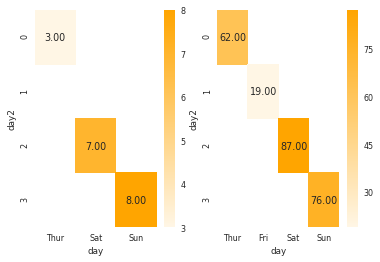

In [52]:
plt.subplot(121)
sns.heatmap(day5, cmap=sns.light_palette("orange", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(122)
sns.heatmap(dayt, cmap=sns.light_palette("orange", as_cmap=True), annot=True, fmt=".2f")
plt.show()

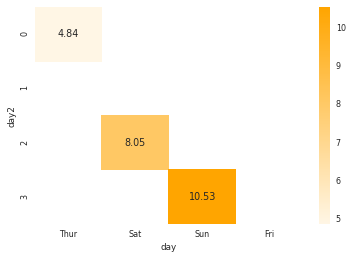

In [53]:
sns.heatmap(day5/dayt*100, cmap=sns.light_palette("orange", as_cmap=True), annot=True, fmt=".2f")
plt.show()

#### 가설 3 검증3.
- 일요일 고객이 upper_5 고객일 확률 10.53%
- 토요일 고객이 upper_5 고객일 확률 8.05%
- 목요일 고객이 upper_5 고객일 확률 4.84%
- 금요일의 경우 upper_5 고객 데이터가 없다.

### 주말에 온 고객에게 팁을 많이 받을 확률이 약 5%p 높다.



---

### 3 - 4 성별 특징

In [54]:
sex5 = tips_upper5.pivot_table(index="sex2", values = 'count', columns='sex', aggfunc=np.sum )
sext = tips.pivot_table(index="sex2", values = 'count', columns='sex', aggfunc=np.sum )

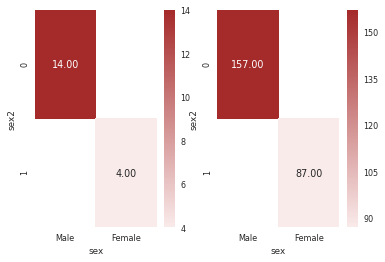

In [55]:
plt.subplot(121)
sns.heatmap(sex5, cmap=sns.light_palette("brown", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(122)
sns.heatmap(sext, cmap=sns.light_palette("brown", as_cmap=True), annot=True, fmt=".2f")
plt.show()

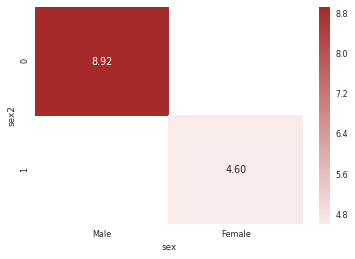

In [56]:
sns.heatmap(sex5/sext*100, cmap=sns.light_palette("brown", as_cmap=True), annot=True, fmt=".2f")
plt.show()

#### 가설 3 검증4.
- 남성 고객이 upper_5 그룹일 확률 8.92%
- 여성 고객이 upper_5 그룹일 확률 4.60%


### 남성 고객에게 팁을 많이 받을 확률이 약 4%p 높다.



---

### 가설 3 - 5 size

In [57]:
size5 = tips_upper5.pivot_table(index="size2", values = 'count', columns='size', aggfunc=np.sum )
sizet = tips.pivot_table(index="size2", values = 'count', columns='size', aggfunc=np.sum )

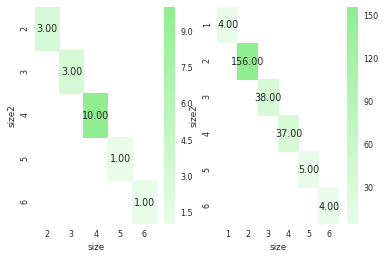

In [58]:
plt.subplot(121)
sns.heatmap(size5, cmap=sns.light_palette("lightgreen", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(122)
sns.heatmap(sizet, cmap=sns.light_palette("lightgreen", as_cmap=True), annot=True, fmt=".2f")
plt.show()

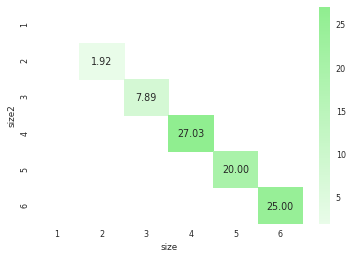

In [59]:
sns.heatmap(size5/sizet*100, cmap=sns.light_palette("lightgreen", as_cmap=True), annot=True, fmt=".2f")
plt.show()

#### 가설 3 검증5.
- size2일때 upper_5그룹일 확률 1.92%
- size4일때 upper_5그룹일 확률 27.03%

### 고객이 4명 이상인 경우 upper_5 그룹일 확률이 높다. 

---

# 결론

### 팁을 많이 받기 위해서는
- **주말** **저녁** 시간 근무가 유리하며,
- 고객을 맞이할 때는
    - **4명 이상**의 그룹으로 구성된 고객이 좋다.
    - (계산을 할 것으로 예상되는) **남성 비흡연자**가 포함되어있다면 금상첨화
    
중요도 순으로는 다음과 같다.

1. 4인이상 (15%p)
1. 주말 (5%p)
1. 남성 (4.3%p)      
1. 저녁시간 (4.1%p)
1. 비흡연자 (1.5%p)

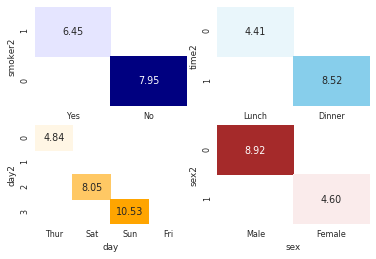

In [60]:
plt.subplot(221)
sns.heatmap(sr/srt*100, cbar=False, cmap=sns.light_palette("navy", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(222)
sns.heatmap(LD/LDt*100, cbar=False, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(223)
sns.heatmap(day5/dayt*100, cbar=False, cmap=sns.light_palette("orange", as_cmap=True), annot=True, fmt=".2f")
plt.subplot(224)
sns.heatmap(sex5/sext*100, cbar=False, cmap=sns.light_palette("brown", as_cmap=True), annot=True, fmt=".2f")

plt.show() #숫자가 높을 수록 upper_5 (5달러이상 낸 그룹)일 확률이 높음.

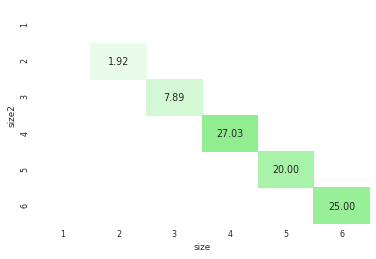

In [61]:
sns.heatmap(size5/sizet*100, cbar=False, cmap=sns.light_palette("lightgreen", as_cmap=True), annot=True, fmt=".2f")
plt.show()

---

updated 180210

### Baye's theorem 
with pgmpy

In [62]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [63]:
model = BayesianModel([('Upper5', 'Smoke'), ('Upper5', 'time'), 
                                     ('Upper5', 'Weekday'), ('Upper5', 'sex'),
                                     ('Upper5', 'size'),])

In [64]:
cpd_a = TabularCPD('Upper5', 2, [[1-18/244, 18/244]])

In [65]:
cpd_s = TabularCPD('Smoke', 2, np.array([[1-87/226, 1-1/3], [87/226, 1/3]]),
                                    evidence=['Upper5'], evidence_card=[2])
cpd_t = TabularCPD('time', 2, np.array([[1-65/226, 1-1/6], [65/226, 1/6]]),
                                    evidence=['Upper5'], evidence_card=[2])
cpd_d = TabularCPD('Weekday', 2, np.array([[1-78/226, 1-1/6], [78/226, 1/6]]),
                                    evidence=['Upper5'], evidence_card=[2])
cpd_sex = TabularCPD('sex', 2, np.array([[1-83/226, 1-2/9], [83/226, 2/9]]),
                                    evidence=['Upper5'], evidence_card=[2])
cpd_size = TabularCPD('size', 2, np.array([[1-154/226, 1-1/3], [154/226, 1/3]]),
                                    evidence=['Upper5'], evidence_card=[2])

In [66]:
model.add_cpds(cpd_a, cpd_s, cpd_t, cpd_d, cpd_sex, cpd_size)
copy_model = model.copy()
copy_model.nodes()

NodeView(('Upper5', 'Smoke', 'time', 'Weekday', 'sex', 'size'))

In [67]:
copy_model.edges()

OutEdgeView([('Upper5', 'Smoke'), ('Upper5', 'time'), ('Upper5', 'Weekday'), ('Upper5', 'sex'), ('Upper5', 'size')])

In [68]:
copy_model.get_cpds()

[<TabularCPD representing P(Upper5:2) at 0x7f1ed6081b00>,
 <TabularCPD representing P(Smoke:2 | Upper5:2) at 0x7f1ee005a9b0>,
 <TabularCPD representing P(time:2 | Upper5:2) at 0x7f1ed6297da0>,
 <TabularCPD representing P(Weekday:2 | Upper5:2) at 0x7f1ed2638b00>,
 <TabularCPD representing P(sex:2 | Upper5:2) at 0x7f1ed61364e0>,
 <TabularCPD representing P(size:2 | Upper5:2) at 0x7f1ed61364a8>]

In [69]:
infer = VariableElimination(model)

posterior0 = infer.query(['Upper5'], 
                    evidence={'time': 0, 'Smoke':0,'Weekday':0, 'sex':0, 'size':0})

posterior1= infer.query(['Upper5'], 
                    evidence={'time': 1, 'Smoke':1, 'Weekday':1, 'sex':1, 'size':1})

print(posterior0['Upper5']) # 모든 조건 충족
print(posterior1['Upper5']) # 모든 조건 반대

╒══════════╤═══════════════╕
│ Upper5   │   phi(Upper5) │
╞══════════╪═══════════════╡
│ Upper5_0 │        0.7516 │
├──────────┼───────────────┤
│ Upper5_1 │        0.2484 │
╘══════════╧═══════════════╛
╒══════════╤═══════════════╕
│ Upper5   │   phi(Upper5) │
╞══════════╪═══════════════╡
│ Upper5_0 │        0.9943 │
├──────────┼───────────────┤
│ Upper5_1 │        0.0057 │
╘══════════╧═══════════════╛



1. 4인이상 (15%p)
1. 주말 (5%p)
1. 남성 (4.3%p)      
1. 저녁시간 (4.1%p)
1. 비흡연자 (1.5%p)

모든 조건을 충족했을 경우, 조건을 하나도 충족하지 못했을 경우보다 **24%** 높은 확률로 팁을 많이 받을 수 있다.

In [70]:
print("total [mean: {}, median: {}]".format(mean_tip, median_tip))
print("upper 5 [mean: {}, median: {}]".format(mean_tip5, median_tip5))
print("less 5 [mean: {}, median: {}]".format(mean_less5, median_less5))

total [mean: 3.0, median: 2.9]
upper 5 [mean: 6.27, median: 5.885]
less 5 [mean: 2.74, median: 2.605]


- 다음은 각 조건을 제외한 모든 조건을 충족했을 경우의 Upper 5를 만날 확률 이다.
> 1. size x : 7%
>1. Weekday x : 11%
>1. sex x : 13%
>1. Dinner x : 14%
>1. smoke x : 20%